1. Load the data

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('D:/Bhavesh/final assignment/live_assignment/Question3dataset/election2024.csv')

# Display the first few rows of the dataset 
data.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


## 2. Understand the data

2.1 Check Basic information

In [2]:
# check the shap of the dataset
print(data.shape)

(1600, 16)


In [3]:
# check data types and non-null counts
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [4]:
# check for missing values
print(data.isnull().sum())

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64


2.2 Basic Statistics

In [5]:
# summary statistics for numerical features
data.describe(include='all')

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
count,1600,1600,1600.000000,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,692,879,1600.000000
unique,1600,2,NaN,8,7,4,6,7,6,6,6,6,11,6,21,NaN
top,07169ed8148ce047,female,NaN,central,city with population of 100-500k,named correct date,definitely yes,Putin,less than 4 hours a day,less than 4 hours a day,college,medium,work for hire,commercial organization,"industry, manufacturing",NaN
freq,1,843,NaN,425,391,1361,1062,1128,490,613,690,949,535,445,138,NaN
mean,NaN,NaN,49.936250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
std,NaN,NaN,16.901797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.327084
min,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.468226
25%,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.772224
50%,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921724
75%,NaN,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.158913


## 3. Data Cleaning

3.1 Handle Missing Values

In [6]:
import numpy as np

# Fill missing values in other columns if necessary
data['job_type'].fillna(data['company_type'].mode()[0], inplace=True)
data['company_type'].fillna(data['company_type'].mode()[0], inplace=True)
 

In [7]:
data.isnull().sum()

id                     0
sex                    0
age                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
job_type               0
company_type           0
weight1                0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             1600 non-null   object 
 14  company_type         1600 non-null   object 
 15  weight1              1600 non-null   f

3.2 Convert Data Types

In [9]:
# Convert columns to the appropriate data types
data['sex'] = data['sex'].astype('object')


In [10]:
# convert to string to numeric
#data['sex'] = data['sex'].apply(lambda x: 1 if x == 'male' else 0)

In [11]:
data.sex

0         male
1         male
2         male
3         male
4         male
         ...  
1595      male
1596    female
1597    female
1598    female
1599    female
Name: sex, Length: 1600, dtype: object

In [12]:
data['sex']

0         male
1         male
2         male
3         male
4         male
         ...  
1595      male
1596    female
1597    female
1598    female
1599    female
Name: sex, Length: 1600, dtype: object

## 4. Exploratory Data Analysis

4.1 Analyze the distribution of key demographic variables

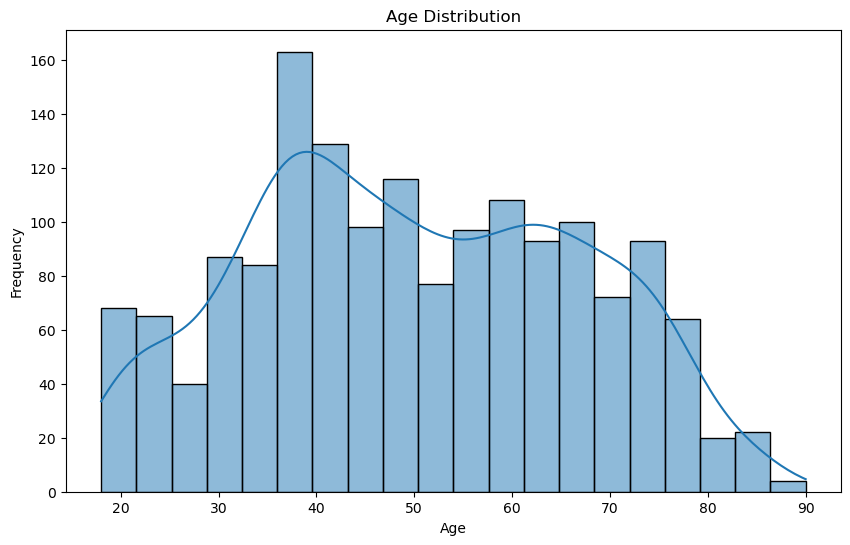

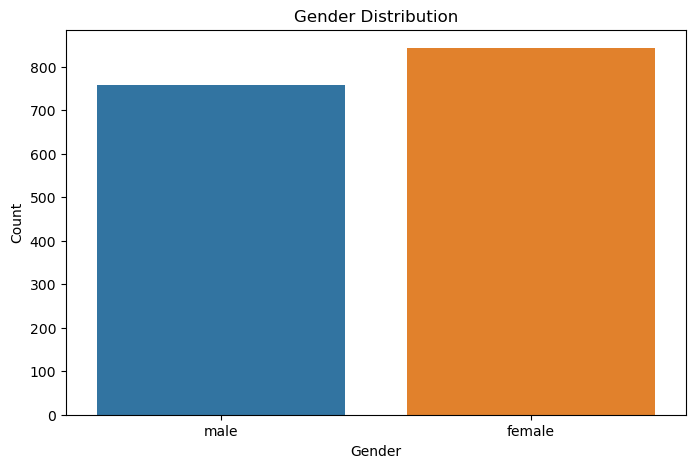

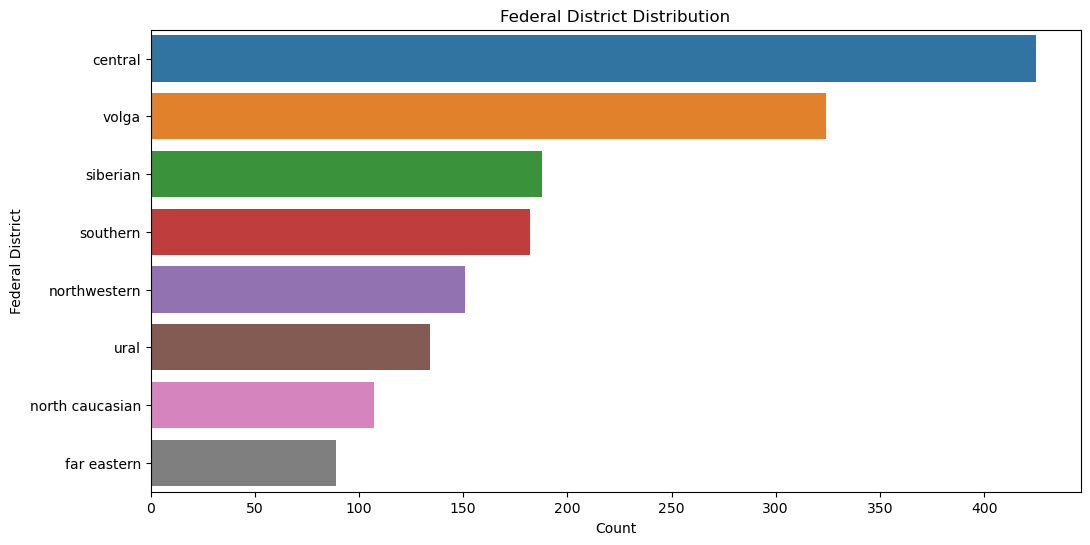

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sex',data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Federal district distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='federal_district', data=data, order=data['federal_district'].value_counts().index)
plt.title('Federal District Distribution')
plt.xlabel('Count')
plt.ylabel('Federal District')
plt.show()


step 5 : Explore voting intentions and preferred candidates

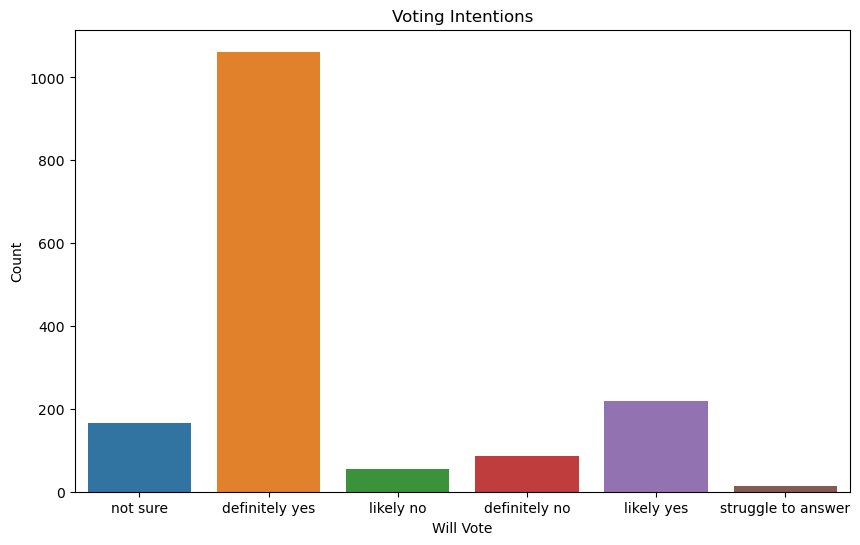

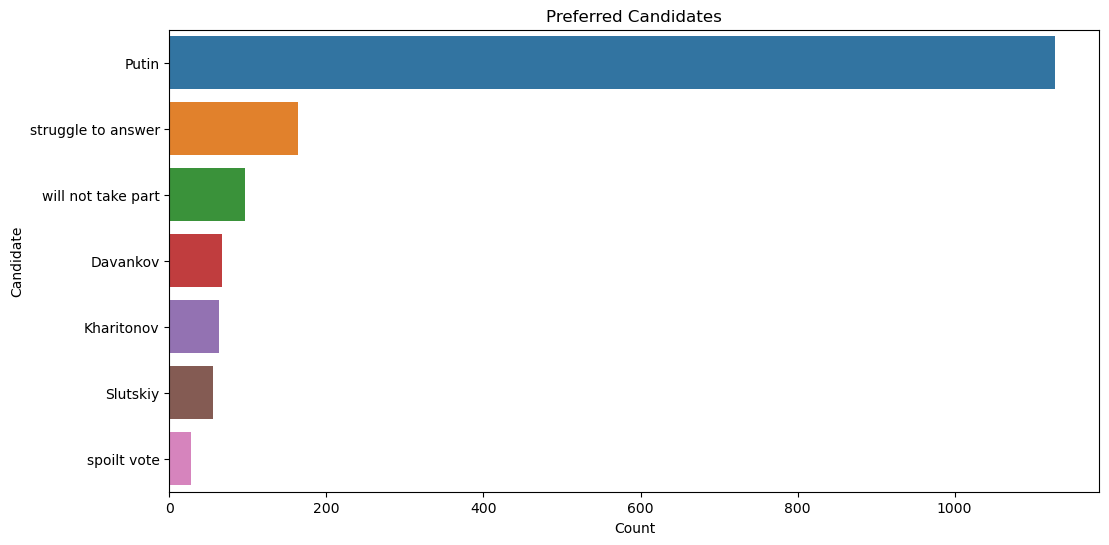

In [14]:
# Voting intentions
plt.figure(figsize=(10, 6))
sns.countplot(x='will_vote',data=data)
plt.title('Voting Intentions')
plt.xlabel('Will Vote')
plt.ylabel('Count')
plt.show()

# Preferred candidates
plt.figure(figsize=(12, 6))
sns.countplot(y='candidate', data=data, order=data['candidate'].value_counts().index)
plt.title('Preferred Candidates')
plt.xlabel('Count')
plt.ylabel('Candidate')
plt.show()


step 6: Examine the relationship between media usage and voting intentions

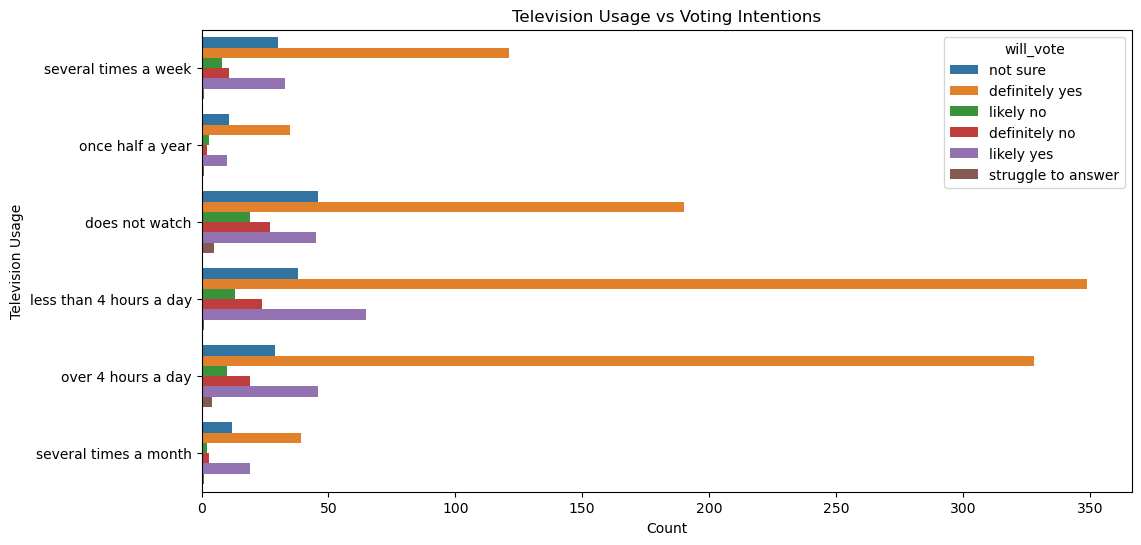

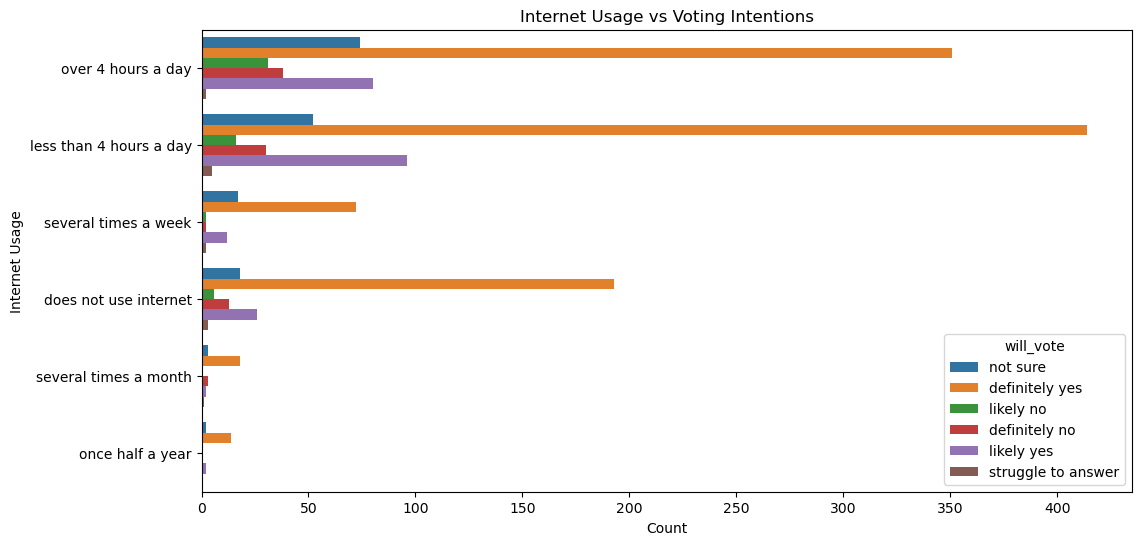

In [15]:
# Relationship between television usage and voting intentions
plt.figure(figsize=(12, 6))
sns.countplot(y='television_usage', hue='will_vote', data=data)
plt.title('Television Usage vs Voting Intentions')
plt.xlabel('Count')
plt.ylabel('Television Usage')
plt.show()

# Relationship between internet usage and voting intentions
plt.figure(figsize=(12, 6))
sns.countplot(y='internet_usage', hue='will_vote', data=data)
plt.title('Internet Usage vs Voting Intentions')
plt.xlabel('Count')
plt.ylabel('Internet Usage')
plt.show()
